# Q1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
df=pd.read_csv("50_Startups.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

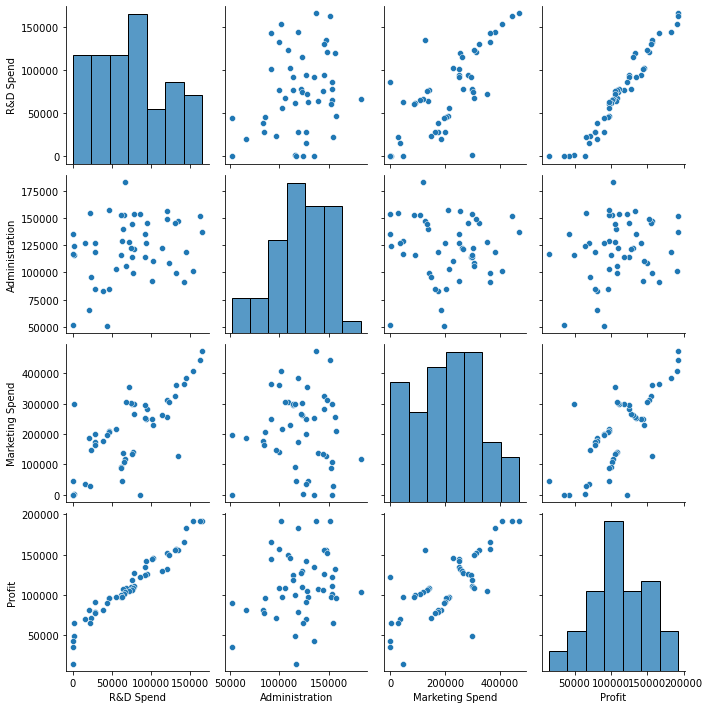

In [6]:
sns.pairplot(df)

C:\Users\Hemanth H L\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

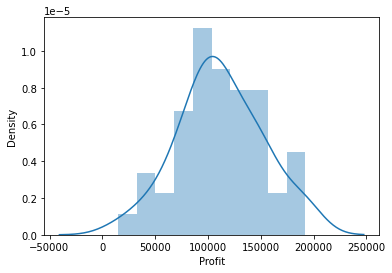

In [7]:
sns.distplot(df.Profit,bins=10)

In [8]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
df=pd.get_dummies(df)

In [10]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

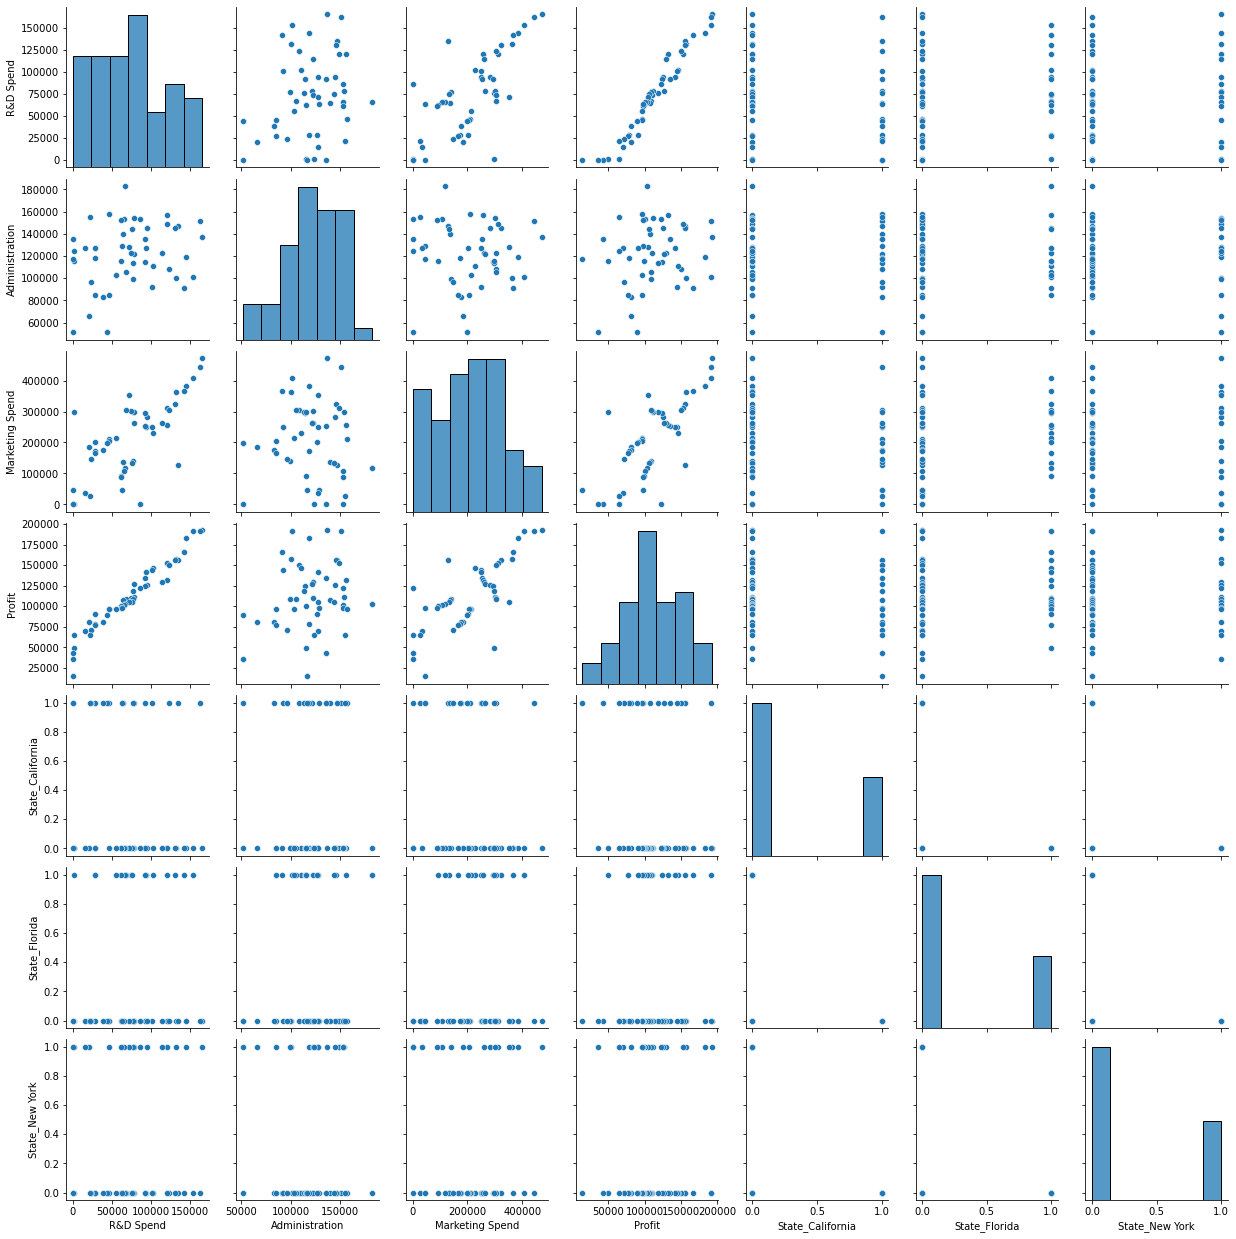

In [11]:
sns.pairplot(df)

In [12]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [13]:
X = df.drop('Profit',axis=1)
y = df['Profit']

In [14]:
X.shape,y.shape

((50, 6), (50,))

In [15]:
df=df.drop(['State_California'],axis=1)

In [16]:
df.shape

(50, 6)

In [17]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
X_scaled = scaler.fit_transform(X)

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [21]:
import statsmodels.api as sm
X1 = sm.add_constant(X_scaled)
result = sm.OLS(y, X1).fit()

In [22]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 28 May 2021   Prob (F-statistic):           1.34e-27
Time:                        15:16:53   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.12e+05   1334.905     83.911      0.000    1.09e+05    1.15e+05
x1          3.663e+04   2108.775     17.369      0.000    3.24e+04    4.09e+04
x2          -748.9975   1448.705     -0.517      0.608   -3668.671    2170.676
x3          3266.2152   2075.251      1.574      0.123    -916.178    7448.608
x4           -24.0672    899.198     -0.027      0.979   -1836.281    1788.147
x5            69.0305    921.579      0.075      0.941   -1788.289    1926.350
x6           -43.9094    890.365     -0.049      0.961   -1838.322    1750.503
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.31e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.7e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [23]:
lr.fit(X_scaled,y)
print(f"intercept: {lr.intercept_}")
print(f"coefficient: {lr.coef_}")
print(f"score: {np.round(lr.score(X_scaled,y),3)}")

intercept: 112012.63920000002
coefficient: [ 3.66264283e+04 -7.48997469e+02  3.26621519e+03 -2.40671596e+01
  6.90305306e+01 -4.39094079e+01]
score: 0.951


In [24]:
from sklearn.linear_model import Lasso

In [25]:
lasso = Lasso()

In [26]:
lasso.fit(X_scaled,y)
print(f"intercept: {lasso.intercept_}")
print(f"coefficient: {lasso.coef_}")
print(f"score: {np.round(lasso.score(X_scaled,y),3)}")

intercept: 112012.63920000002
coefficient: [ 3.66248937e+04 -7.47608621e+02  3.26657041e+03 -0.00000000e+00
  9.21196369e+01 -1.90781174e+01]
score: 0.951


In [27]:
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

# toyota corolla dataset

In [28]:
df = pd.read_csv("ToyotaCorolla.csv",encoding= 'unicode_escape')

In [29]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [30]:
df.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [31]:
df = pd.get_dummies(df,columns=['Fuel_Type'],drop_first=True)

In [32]:
df.drop('Id',axis=1,inplace=True)

In [33]:
df.drop(['Mfg_Month','Mfg_Year'],axis=1,inplace=True)

In [34]:
df.corr()

,Price,Age_08_04,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,...,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876590,-0.569960,0.314990,0.108905,0.033081,0.126389,0.185326,NaN,0.063104,...,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369,0.054084,-0.038516
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,NaN,-0.005364,...,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720,-0.097740,0.092611
KM,-0.569960,0.505672,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,NaN,0.015023,...,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153,0.403060,-0.433160
HP,0.314990,-0.156622,-0.333538,1.000000,0.058712,0.013144,0.035856,0.092424,NaN,0.209477,...,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271,-0.533453,0.489110
Met_Color,0.108905,-0.108150,-0.080503,0.058712,1.000000,-0.019335,0.031812,0.085243,NaN,0.018601,...,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536,-0.012420,0.004872
Automatic,0.033081,0.031717,-0.081854,0.013144,-0.019335,1.000000,0.066740,-0.027654,NaN,-0.098555,...,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786,-0.084490,0.080249
cc,0.126389,-0.098084,0.102683,0.035856,0.031812,0.066740,1.000000,0.079903,NaN,0.014629,...,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725,0.327723,-0.315170
Doors,0.185326,-0.148359,-0.036197,0.092424,0.085243,-0.027654,0.079903,1.000000,NaN,-0.160141,...,0.059792,-0.008318,0.064705,-0.129881,-0.022542,-0.039555,-0.008265,0.102292,0.025495,-0.027589
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,0.018601,-0.098555,0.014629,-0.160141,NaN,1.000000,...,0.021200,0.015090,0.238789,0.174117,0.076705,0.295077,0.015397,-0.029357,-0.048847,0.063182


In [35]:
df = pd.get_dummies(df,columns=['Doors'],drop_first=True)

In [36]:
df = pd.get_dummies(df,columns=['Color'],drop_first=True)

In [37]:
df.corr()

,Price,Age_08_04,KM,HP,Met_Color,Automatic,cc,Cylinders,Gears,Quarterly_Tax,...,Doors_5,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
Price,1.000000,-0.876590,-0.569960,0.314990,0.108905,0.033081,0.126389,NaN,0.063104,0.219197,...,0.200352,0.034896,0.014431,-0.104963,0.169947,-0.103803,0.028562,-0.016848,-0.103360,0.022726
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.108150,0.031717,-0.098084,NaN,-0.005364,-0.198431,...,-0.162726,-0.019399,-0.032955,0.103530,-0.137660,0.098365,-0.028550,0.017916,0.050933,-0.040883
KM,-0.569960,0.505672,1.000000,-0.333538,-0.080503,-0.081854,0.102683,NaN,0.015023,0.278165,...,-0.046756,0.039012,-0.003840,-0.017439,-0.112194,0.052190,0.006113,0.018810,0.130403,-0.037995
HP,0.314990,-0.156622,-0.333538,1.000000,0.058712,0.013144,0.035856,NaN,0.209477,-0.298432,...,0.082049,-0.002040,-0.027949,0.021242,0.021349,0.011700,0.014300,-0.012359,-0.093928,-0.000516
Met_Color,0.108905,-0.108150,-0.080503,0.058712,1.000000,-0.019335,0.031812,NaN,0.018601,0.011326,...,0.072057,0.061789,0.044972,0.084797,0.072634,-0.261828,0.104902,0.036691,-0.203738,0.031764
Automatic,0.033081,0.031717,-0.081854,0.013144,-0.019335,1.000000,0.066740,NaN,-0.098555,-0.055371,...,-0.045925,-0.041491,-0.005847,0.056846,0.001725,-0.026799,0.045772,-0.012837,-0.036079,-0.011114
cc,0.126389,-0.098084,0.102683,0.035856,0.031812,0.066740,1.000000,NaN,0.014629,0.306996,...,0.074187,-0.007964,0.029421,-0.010579,-0.009867,-0.008865,-0.001351,-0.015804,0.027304,-0.011884
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,0.018601,-0.098555,0.014629,NaN,1.000000,-0.005452,...,-0.132068,0.129995,-0.023121,-0.049470,-0.026921,0.034076,-0.069296,-0.007422,-0.020859,-0.006425
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.011326,-0.055371,0.306996,NaN,-0.005452,1.000000,...,0.120802,0.005516,-0.021361,-0.049610,0.047443,0.016672,-0.023992,-0.023296,0.051885,-0.008297


In [38]:
df.drop(['Color_Black','Color_Blue','Color_Green','Color_Grey','Color_Red','Color_Silver','Color_Violet','Color_White','Color_Yellow'],axis=1,inplace=True)

In [39]:
df.isnull().sum()

Model               0
Price               0
Age_08_04           0
KM                  0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
Doors_3             0
Doors_4             0
Doors_5             0
dtype: int64

<AxesSubplot:>

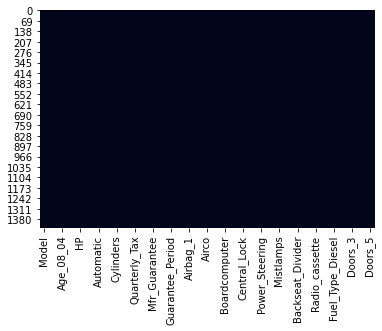

In [40]:
sns.heatmap(df.isnull(), cbar=False)

In [41]:
df.Cylinders.unique()

array([4], dtype=int64)

In [42]:
df.drop('Cylinders',axis=1,inplace=True)

In [43]:
df.nunique()

Model                372
Price                236
Age_08_04             77
KM                  1263
HP                    12
Met_Color              2
Automatic              2
cc                    13
Gears                  4
Quarterly_Tax         13
Weight                59
Mfr_Guarantee          2
BOVAG_Guarantee        2
Guarantee_Period       9
ABS                    2
Airbag_1               2
Airbag_2               2
Airco                  2
Automatic_airco        2
Boardcomputer          2
CD_Player              2
Central_Lock           2
Powered_Windows        2
Power_Steering         2
Radio                  2
Mistlamps              2
Sport_Model            2
Backseat_Divider       2
Metallic_Rim           2
Radio_cassette         2
Tow_Bar                2
Fuel_Type_Diesel       2
Fuel_Type_Petrol       2
Doors_3                2
Doors_4                2
Doors_5                2
dtype: int64

In [44]:
df.drop('Model',axis=1,inplace=True)

In [45]:
corelation = df.corr()

In [46]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [47]:
X = df.drop('Price',axis=1)
y = df['Price']

In [48]:
X_scaled = scale.fit_transform(X,y)

In [49]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [50]:
ridge.fit(X_scaled,y)
print(f"intercept: {ridge.intercept_}")
print(f"coefficient: {ridge.coef_}")
print(f"score: {np.round(ridge.score(X_scaled,y),3)}")

intercept: 10730.824512534818
coefficient: [-2089.43331534  -625.53133909   263.040051     -12.59636423
    63.86725197   -58.16360449    40.97077651   616.23617252
   640.76402113   116.00127357   148.44762146   202.89182873
   -89.94497235    11.99451124   -61.1506399     86.66040305
   594.29159047   -70.84035507   113.94141749   -22.91950401
   181.50529525    28.31206648   144.80215496   -11.62970376
   119.91543983  -115.60167994    73.25308678  -182.82803447
   -85.5427898    252.1999638    714.51504584  -321.90859088
  -169.28029682  -290.61134101]
score: 0.902
